# Projeto Data Science - Avaliação de algoritmos supervisionados para análise de churn

## Etapas dentro do projeto

1. Entendimento do problema de negócio
2. Extração/Obtenção de dados
3. Ajuste de dados (Limpeza dos dados)
4. Análise exploratória
5. Modelagem + Algoritmos
6. Interpretação dos resultados

## Contexto

- A base de dados disponível representa informações sobre gerais sobre clientes de um banco, e a principal informação está relacionada à retenção ou saída do cliente de acordo com seu perfil (**análise de _churn_**);
- O objetivo principal é determinar um modelo de classificação eficiente para predição da saída ou não desses clientes de acordo com as informações disponíveis, realizando a análise exploratória dos dados e avaliação de diferentes modelos para aprendizado supervisionado;
- **O dataset encontra-se disponível para download dentro do repositório Github.**

In [14]:
## Bibliotecas para manipulação de dados e visualização gráfica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## Modificando o diretório do trabalho
import os 
path = r'C:\Users\cador\OneDrive\Área de Trabalho\Projetos Github\DS Project - Churn'
os.chdir(path)

dset = pd.read_csv('Churn.csv', sep = ',')

# Verificação dos dados no início da tabela
dset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Análise exploratória inicial do banco de dados

- Dimensão de linhas e colunas da base de dados;
- Variáveis independentes do problema;
- Classes existentes na coluna _Exited_ - Variável dependente;
- Verificação de valores faltantes (NaN);
- Informações gerais sobre o dataset.

In [15]:
## Análise preliminar dos dados

print(f'Quantidade de linhas: {dset.shape[0]}\n')
print(f'Quantidade de colunas: {dset.shape[1]}\n')

# Variáveis do problema
print(f'Variáveis do problema: \n{dset[dset.columns[:-1]].columns.tolist()}\n')
print(f'Classes existentes: \n{dset[dset.columns[-1]].unique()}\n')

# Verificando missing values (NaN)
dset.isnull().sum() 

# Verificando características do dataset
dset.info()

Quantidade de linhas: 10000

Quantidade de colunas: 14

Variáveis do problema: 
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Classes existentes: 
[1 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActive

### Comentários

- A base de dados possui dados suficientes para treinamento, validação e teste;
- Não há existência de valores ausentes;
- Apresenta-se como um problema de classificação binário, já que a coluna _Exited_ possui apenas duas classes existentes;
- As colunas possuem dados de dois tipos: _strings_ e numéricos (inteiros e decimais).

## Pré-tratamento dos dados

- Eliminação das colunas irrelevantes para o problema (características individuais dos clientes);
- Separação da variável dependente (_Exited_);
- Análise das variáveis contínuas e categóricas.

In [42]:
## Pré-tratamento dos dados

# Eliminando variáveis que não são úteis para o problema
churn = dset.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

# Criando variáveis dependentes e independentes
Y = churn['Exited']               # isolando variável de saída 'Exited' (variável resposta)
X = churn
X = churn.drop('Exited', axis = 1) # Retirando a coluna da variável de saída 

# Separando variáveis contínuas e categóricas
x_cont = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary'] # variáveis numéricas

# Variáveis categóricas 
x_categ = list(set(X) - set(x_cont)) # listagem das colunas com variáveis categóricas  
X_dummies = X[x_categ]               # dataframe contendo informações das variáveis categóricas 
X_cont = X[list(set(x_cont))]        # dataframe contendo informações das variáveis numéricas 

# Visualização das matrizes individuais criadas
display(X_dummies.head(5))
display(X_cont.head(5))

,NumOfProducts,Geography,Gender,IsActiveMember,Tenure,HasCrCard
0,1,France,Female,1,2,1
1,1,Spain,Female,1,1,0
2,3,France,Female,0,8,1
3,2,France,Female,0,1,0
4,1,Spain,Female,1,2,1


,Balance,CreditScore,Age,EstimatedSalary
0,0.00,619,42,101348.88
1,83807.86,608,41,112542.58
2,159660.80,502,42,113931.57
3,0.00,699,39,93826.63
4,125510.82,850,43,79084.10


### Análise Exploratória e Tratar Outliers

- Análise das features:
    1. Ver a correlação entre as features e decidir se todas serão mantidas
    2. Investigação de outliers (usaremos como regra, valores abaixo de Q1 - 1.5 x Amplitude e valores acima de Q3 + 1.5 x Amplitude).<br> Amplitude = Q3 - Q1, sendo Q1 = primeiro quartil e Q3 = terceiro quartil;
    3. Confirmar se todas as features fazem realmente sentido para o problema de negócio. 
    
**Cuidado**: A exclusão do outlier pode fornecer informações importantes para o negócio. A condição de outlier pode fornecer características importantes para o modelo de classificação.

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

<AxesSubplot:>

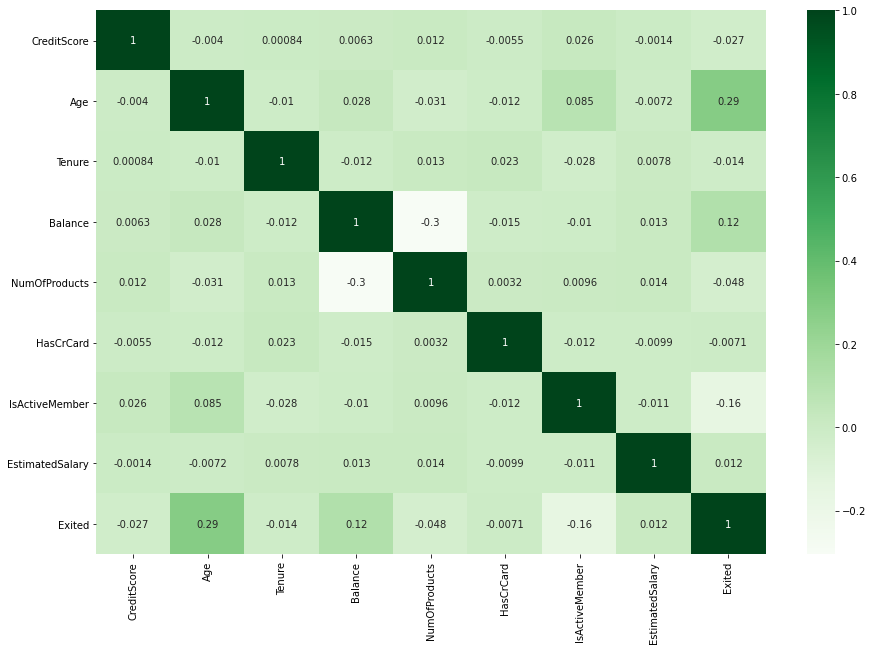

In [17]:
# Matriz de correlação
correl = churn.corr()
display(correl['Exited'])

plt.figure(figsize = (15, 10))
sns.heatmap(correl, annot = True, cmap = 'Greens')

### Comentários

- A matriz de correlação não indica valores para correlação acentuada entre as variáveis presentes. Inicialmente, não será efetuada nenhuma exclusão de colunas baseadas apenas nessa análise;
- O ponto maior destaque é a correlação entre a variável _Exited_ e _Age_.

### Definição de Funções para Análise de Outliers

Definição de funções para auxiliar na análise de outliers das colunas e realização dos gráficos:

In [18]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

In [19]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x = coluna, ax = ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x = coluna, ax = ax2)
    
def histograma(coluna):
    plt.figure(figsize = (15, 5))
    sns.distplot(coluna, hist = True)

def grafico_barra(coluna):  
    plt.figure(figsize = (15, 5))
    ax = sns.barplot(x = coluna.value_counts().index, y = coluna.value_counts())
    ax.set_xlim(limites(coluna))

### Análise da variável _Balance_

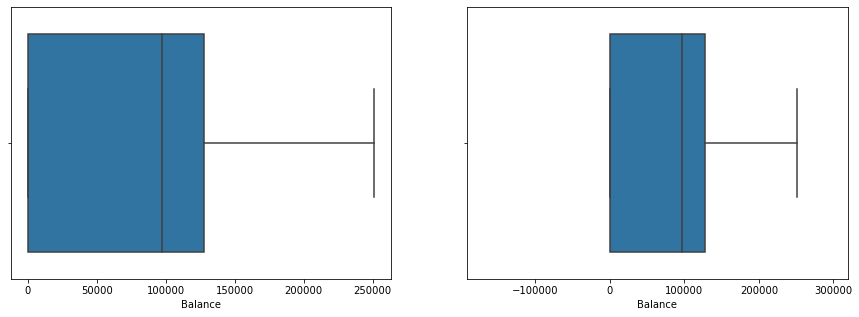

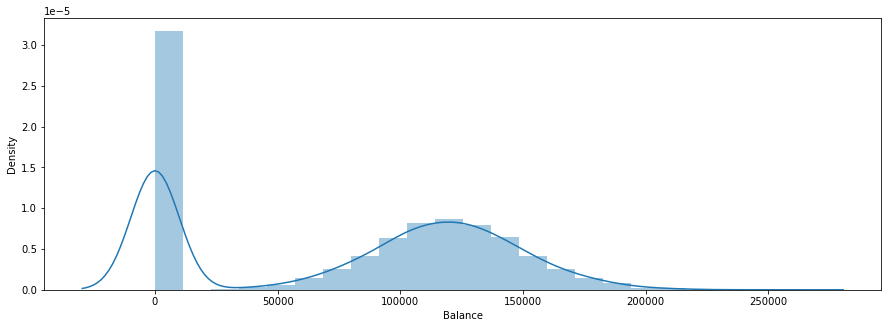

In [43]:
diagrama_caixa(X_cont['Balance'])
histograma(X_cont['Balance'])

In [44]:
X_cont, linhas_removidas = excluir_outliers(X_cont, 'Balance')
print('{} linhas removidas'.format(linhas_removidas))

0 linhas removidas


- Não há a presença de _outliers_ para essa variável. A distribuição evidenciada pelo histograma mostra uma concentração de valores próxima ao valor nulo (0), o que pode influenciar diretamente na retenção ou saída desse cliente dentre do banco.

### Análise da variável _Credit Score_

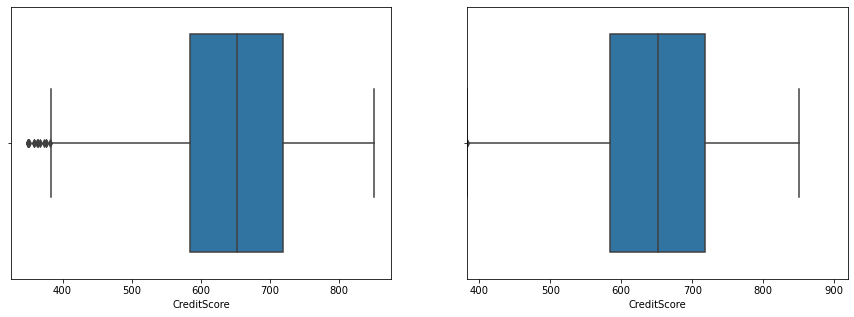

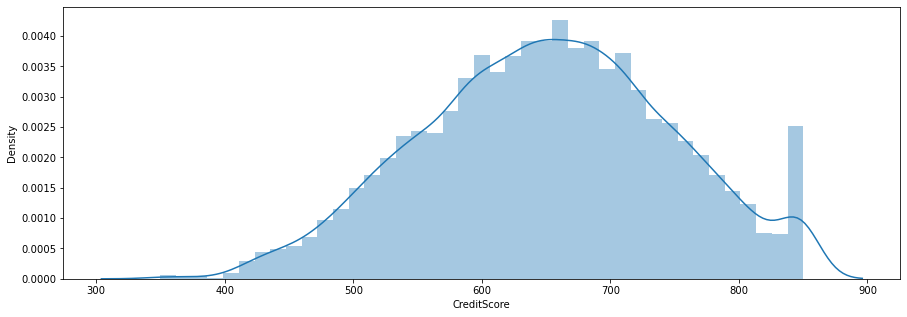

In [22]:
diagrama_caixa(X_cont['CreditScore'])
histograma(X_cont['CreditScore'])

A quantidade de outliers é baixa, e a distribuição está próxima do limite inferior da variável _Credit Score_. Dessa maneira, são serão excluídas as informações já que o dataset não possui uma quantidade muito grande de dados disponíveis.

### Análise da variável _Estimated Salary_

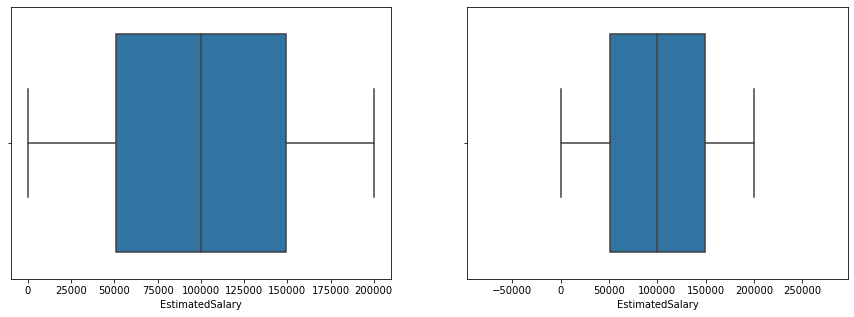

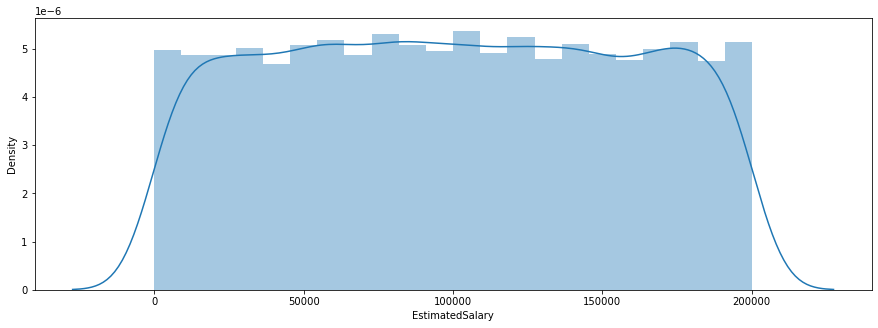

In [45]:
diagrama_caixa(X_cont['EstimatedSalary'])
histograma(X_cont['EstimatedSalary'])

- A variável _Estimated Salary_ também apresenta uma distribuição comportada, sem a presenção de outliers evidenciado pelo boxplot. O resultado apresentado pelo histograma evidencia uma distribuição aproximadamente uniforme dentro do intervalo de valores. 

### Análise da variável _Age_

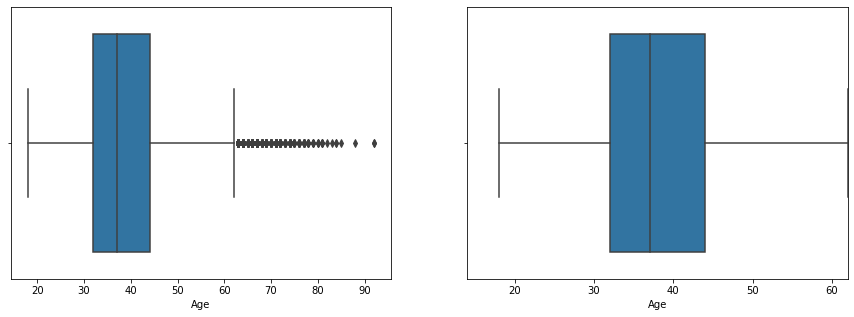

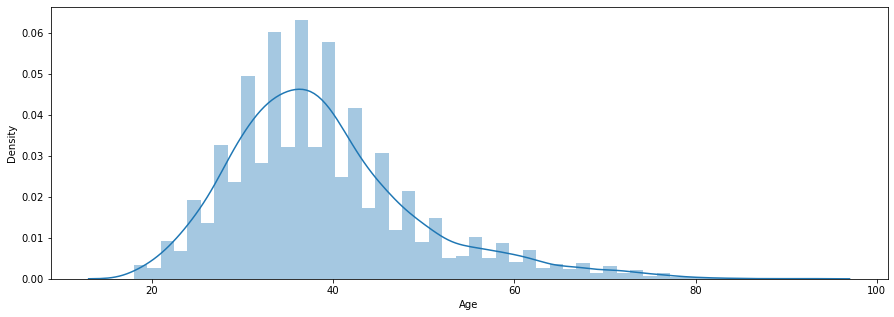

In [24]:
diagrama_caixa(X_cont['Age'])
histograma(X_cont['Age'])

Observa-se uma presença maior de outliers para a variável _Age_, contudo esses dados são serão excluídos por dois motivos principais:
- Quantidade limitada de informações no dataset;
- A variável _Age_ apresentou a maior correlação com a variável _Exited_. A remoção desses outliers podem retirar informações importantes em relação ao problema de classificação proposto.

### Análise da variável _Exited_

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Análise de distribuição de frequência da Variável Exited')

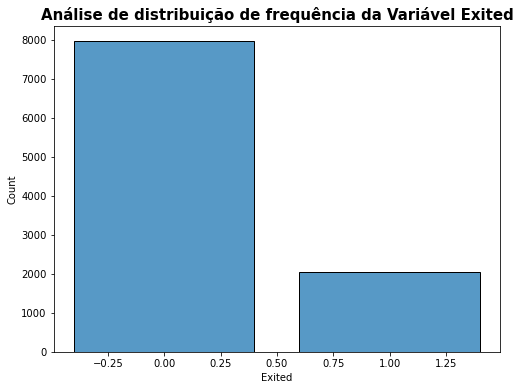

In [46]:
display(churn['Exited'].value_counts())

fig = plt.figure(figsize = (8,6))
sns.histplot(data = churn['Exited'], stat = 'count',discrete = True, shrink = .8)
plt.title('Análise de distribuição de frequência da Variável Exited', 
         fontsize = 15, weight = 'bold')

- É interessante destacar que a variável dependente possui um forte desbalanceamento dos dados, como evidenciado pelo gráfico de barras e a contagem de valores. **Possivelmente, esse desequilíbrio entre as classes pode afetar o desempenho do treinamento e previsão dos modelos, especialmente para classe 1. Por isso, pode ser interesse testar o balanceamento das classes durante a avaliação dos modelos.**

### Análise final

- As variáveis categóricas pertencentes à base de dados original ('IsActiveMember', 'Geography', 'NumbofProducts', 'Gender', 'HasCrCard') não possuem muitas classes e podem ser importantes para o modelo final. Após isso, será analisada a importância de cada variável para o modelo escolhido e, a partir disso, pode ser feita a exclusão de alguma coluna irrelevante para o problema de classificação.
- Os ajustes finais do dataset (_enconding_ e normalização de variáveis numéricas) serão feitos para realização etapa de treinamento/validação e testes.

### Enconding 

- Features de Valores True or False ou classificação binária ('Gender') precisam ser transformados em variáveis numéricas;
- Features de categorias serão tratados pelo método de variáveis dummies.
**Obs: A variável dependente _Exited_ já está devidamente preenchida e, portanto, não necessita a etapa de enconding.**

### Normalização de variáveis numéricas contínuas

- Evitar distorções por diferenças de escala numérica durante o treinamento do modelo.

In [47]:
## Processamento das variáveis categóricas 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Conversão da coluna categórica ('Gender') com atribuição de números inteiros para
# variáveis 'Masculino' e 'Feminino'

lab_enc = LabelEncoder()
X['Gender'] = lab_enc.fit_transform(X['Gender']) 

# 'Female' -  Variável binária 0
# 'Male' - Variável binária 1

# A função get_dummies() transforma uma variável em variável dummy(), criando
# novas colunas para transformar a variável em binária. 

X_final = pd.get_dummies(data = X, columns = ['Geography','NumOfProducts'])

# Método Minimax é definido como:
    
    # valor_padronizado = (valor - Coluna.min)/(Coluna.max - Coluna.min)
    # As variáveis contínuas são classificadas em uma escala entre 0 e 1 ]
    # Uniformizar a escala das variáveis numéricas do dataset
    
scaler = MinMaxScaler()
X_final[x_cont] = scaler.fit_transform(X_final[x_cont])
display(X_final.head(10))

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0,0.324324,2,0.000000,1,1,0.506735,1,0,0,1,0,0,0
1,0.516,0,0.310811,1,0.334031,0,1,0.562709,0,0,1,1,0,0,0
2,0.304,0,0.324324,8,0.636357,1,0,0.569654,1,0,0,0,0,1,0
3,0.698,0,0.283784,1,0.000000,0,0,0.469120,1,0,0,0,1,0,0
4,1.000,0,0.337838,2,0.500246,1,1,0.395400,0,0,1,1,0,0,0
5,0.590,1,0.351351,8,0.453394,1,0,0.748797,0,0,1,0,1,0,0
6,0.944,1,0.432432,7,0.000000,1,1,0.050261,1,0,0,0,1,0,0
7,0.052,0,0.148649,4,0.458540,1,0,0.596733,0,1,0,0,0,0,1
8,0.302,1,0.351351,4,0.566170,0,1,0.374680,1,0,0,0,1,0,0
9,0.668,1,0.121622,2,0.536488,1,1,0.358605,1,0,0,1,0,0,0


### Modelos de previsão e métricas de avaliação

- **Métricas de Avaliação**

**1) Acurácia** = representa o número correto de previsões corretas, ou seja, identificação correta de classes.

**2) Precisão** = métrica que traz a informação da quantidade de observações classificadas como verdadeiras que realmente são verdadeiras. 

**3) Recall (Sensibilidade)** = proporção dos verdadeiros positivos entre todas as observações que realmente são positivas no conjunto de dados. 

**4) F1-Score** = média harmônica entre o recall e a precisão, sendo utilizada quando temos classes desbalanceadas.

$F1-Score = \frac{2 * (Precisão * Recall)}{Precisão + Recall}$
    
- **Modelos**

**1) Regressão Logística**

**2) Random Forest**

## Algortimo 1 - Regressão Logística

In [68]:
#importando pacotes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, classification_report

# Criando os dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_final, Y, test_size = 0.20, random_state = 42)

# Importando biblioteca com algoritmo da regressão logística 
reglog = LogisticRegression()

# Realizando a validação cruzada 
lista_C = list(np.logspace(0,10,50))
param_grid = dict(C = lista_C) 
clf = GridSearchCV(reglog, param_grid, cv = 10, scoring = 'recall')

# Ajustando modelo de regressão logística
clf.fit(x_treino, y_treino)
resultado_reglog = clf.predict(x_teste)


Acurácia do modelo padrão: 84.3 %


Precisão do modelo padrão: 69.1 %

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.69      0.36      0.48       393

    accuracy                           0.84      2000
   macro avg       0.78      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000



Text(0.5, 257.44, 'Dados preditos')

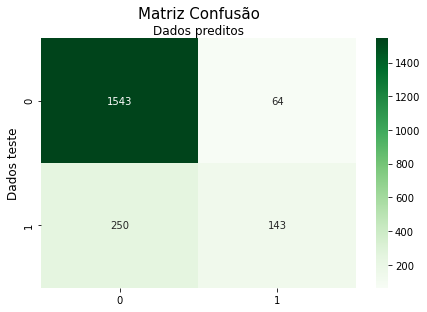

In [69]:
# Avaliação e Visualização dos resultados
acuracia = accuracy_score(y_teste, resultado_reglog)
print('\nAcurácia do modelo padrão: {:.3} %\n'.format(acuracia*100))

precisao = precision_score(y_teste, resultado_reglog)
print('\nPrecisão do modelo padrão: {:.3} %\n'.format(precisao*100))

class_report = classification_report(y_teste, resultado_reglog)
print('Relatório de classificação:\n', class_report)

# Edição dos componentes do gráfico
classes = [0,1]
fig, ax = plt.subplots()
marcadores = np.arange(len(classes))
plt.xticks(marcadores, classes)
plt.yticks(marcadores, classes)

# Criação do mapa de calor
matriz_reglog = confusion_matrix(y_teste,resultado_reglog)
sns.heatmap(pd.DataFrame(matriz_reglog), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz Confusão', fontsize = 15)
plt.ylabel('Dados teste', fontsize = 12)
plt.xlabel('Dados preditos', fontsize = 12)

### Comentários

- Acurácia do modelo não foi baixa, porém grande parte dos acertos pertence à classe 0, ou seja, pessoas que permaneceram como clientes do banco nessa base de dados;
- O parâmetro _recall_ para classe 1 é muito inferior quando comparada à classe 0, o que significa uma baixa capacidade de previsão do modelo para os clientes que realmente cancelaram sua conta. O principal objetivo é identificar a probabilidade de saída de clientes baseado nas características apresentadas e, portanto, não foi efetivo tão efetivo nesse quesito quando comparada à qualidade de previsão dos clientes remanescentes; 
- Ambos os parâmetros de precisão e _recall_ foram melhores para a classe 0 e, consequentemente, o parâmetro _f1-score_ também foi significativamente superior para essa classe. 

## Algoritmo 2 - Random Forest

In [70]:
## Aplicação do algoritmo de Random Forest ##

from sklearn.ensemble import RandomForestClassifier

# Definindo melhores parâmetros entre as variáveis n_estimator, max_depth e min_samples_leaf
parameters = {'n_estimators':[30,40,50,60,70,80,90,100], 'max_depth':[3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[3,4,5,6,7,8,9,10]}
randomforest = RandomForestClassifier(n_jobs=-1)
clf2 = GridSearchCV(randomforest, parameters, cv = 5, scoring = 'accuracy', verbose = 1)

# Validação cruzada do modelo Random Forest 
clf2.fit(x_treino, y_treino)
random_forest = clf2.predict(x_teste)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits



Acurácia do modelo padrão: 86.2 %


Precisão do modelo padrão: 75.2 %

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 257.44, 'Dados preditos')

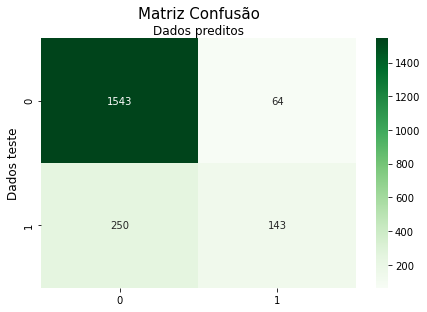

In [71]:
# Avaliação e Visualização dos resultados
acuracia = accuracy_score(y_teste, random_forest)
print('\nAcurácia do modelo padrão: {:.3} %\n'.format(acuracia*100))

precisao = precision_score(y_teste, random_forest)
print('\nPrecisão do modelo padrão: {:.3} %\n'.format(precisao*100))

class_report = classification_report(y_teste, random_forest)
print('Relatório de classificação:\n', class_report)

# Edição dos componentes do gráfico
classes = [0,1]
fig, ax = plt.subplots()
marcadores = np.arange(len(classes))
plt.xticks(marcadores, classes)
plt.yticks(marcadores, classes)

# Criação do mapa de calor
matriz_rf = confusion_matrix(y_teste, random_forest)
sns.heatmap(pd.DataFrame(matriz_reglog), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz Confusão', fontsize = 15)
plt.ylabel('Dados teste', fontsize = 12)
plt.xlabel('Dados preditos', fontsize = 12)


### Comentários

- Acurácia do modelo não foi baixa, porém grande parte dos acertos pertence à classe 0, ou seja, pessoas que pertenceram como clientes do banco (desempenho um pouco superior à regressão logística);
- Os parâmetros _recall_ e _f1-score_ corroboram as observações anteriormente feitas para a regressão logística. Porém o _random forest_ obteve o melhor desempenho dentro os dois algoritmos, o que seria já esperado devido à sua complexidade e a composição de diferentes estimadores na composição do modelo. 
- **Naturalmente, a escolha de acordo do modelo de acordo com as condições iniciais seria _Random Forest_ pelo análise conjunta dos parâmetros dado o problema de negócio. Para continuidade do estudo a seguir, será afetuada uma análise para com dados balanceados pela regressão logística e _random forest_.**

## Balanceamento de dados

- O problema de desbalanceamento de dados pode ser resolvido através de técnicas de reamostragem, atingindo uma amostra baseada no dataset com melhor balanceamento.
- Como o dataset possui um número limitado de linhas, utilizaremos a técnica de oversampling replicando as observações da classe em menor quantidade.
- **O rebalanceamento deve ser realizado apenas no dataset de treino. Caso essa reamostragem seja feita no dataset de teste, haverá uma alteração dos dados reais para avaliação do algoritmo treinado.**
- **P.s: Esse tipo de tratamento é aconselhável para datasets com quantidade limitada de informações e não poder haver perdas em relação ao dados. Por outro lado, adicionar repetições de observações pode enviesar o modelo e piorar o resultado em relação à determinada variável.**

(12712, 15)

(12712,)

1    6356
0    6356
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Análise de distribuição de frequência da Variável Exited')

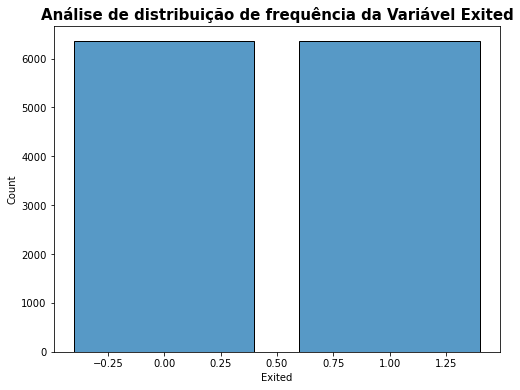

In [72]:
# Importando biblioteca imblearn 
from imblearn.over_sampling import RandomOverSampler

# Método de balanceamento de dados - Oversampling
ros = RandomOverSampler(random_state = 42)

# Rebalanceamento do dataset de treino
X_resampled, y_resampled = ros.fit_resample(x_treino, y_treino)

display(X_resampled.shape)
display(y_resampled.shape)

display(y_resampled.value_counts())

fig = plt.figure(figsize = (8,6))
sns.histplot(data = y_resampled, stat = 'count',discrete = True, shrink = .8)
plt.title('Análise de distribuição de frequência da Variável Exited', 
         fontsize = 15, weight = 'bold')

## Algoritmo 1 - Regressão Logística 

In [73]:
# Importando biblioteca com algoritmo da regressão logística 
reglog = LogisticRegression()

# Realizando a validação cruzada 
lista_C = list(np.logspace(0,10,50))
param_grid = dict(C = lista_C) 
clf = GridSearchCV(reglog, param_grid, cv = 10, scoring = 'recall')

# Ajustando modelo de regressão logística
clf.fit(X_resampled, y_resampled)
resultado_reglog = clf.predict(x_teste)


 Hiperparâmetros otimizados: {'C': 1.0} 


Acurácia do modelo padrão: 76.4 %


Precisão do modelo padrão: 44.3 %

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84      1607
           1       0.44      0.77      0.56       393

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.76      0.78      2000



Text(0.5, 257.44, 'Dados preditos')

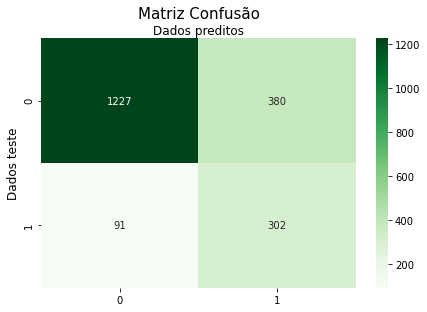

In [74]:
# Avaliação e Visualização dos resultados

print('\n Hiperparâmetros otimizados: {} \n'.format(clf.best_params_))

acuracia = accuracy_score(y_teste, resultado_reglog)
print('\nAcurácia do modelo padrão: {:.3} %\n'.format(acuracia * 100))

precisao = precision_score(y_teste, resultado_reglog)
print('\nPrecisão do modelo padrão: {:.3} %\n'.format(precisao * 100))

class_report = classification_report(y_teste, resultado_reglog)
print('Relatório de classificação:\n', class_report)

# Edição dos componentes do gráfico
classes = [0,1]
fig, ax = plt.subplots()
marcadores = np.arange(len(classes))
plt.xticks(marcadores, classes)
plt.yticks(marcadores, classes)

# Criação do mapa de calor
matriz_reglog = confusion_matrix(y_teste,resultado_reglog)
sns.heatmap(pd.DataFrame(matriz_reglog), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz Confusão', fontsize = 15)
plt.ylabel('Dados teste', fontsize = 12)
plt.xlabel('Dados preditos', fontsize = 12)

### Comentários

- As métricas de acurácia e precisão em relação ao modelos desbalanceado reflitiram perda de desempenho;
- Observa-se uma melhora significativa em relação ao _recall_ da classe 1, o que indica maior sensibilidade do modelo para os casos reais de pessoas que efetivamente saíram da clientela do banco;
- Em contrapartida, a precisão do modelo para classe 1 também diminui, consequência do enviesamento causado pela técnica de oversampling;
- O parâmetro _f1-score_ melhorou para classe 1, porém piorou para classe 0. Esse resultado é esperado devido ao enviesamento provocado pelo rebalanceamentos dos dados.

## Algoritmo 2 - Random Forest

In [75]:
clf2 = GridSearchCV(randomforest, parameters, cv = 10, scoring = 'recall', verbose = 1)

# Validação cruzada do modelo Random Forest 
clf2.fit(X_resampled, y_resampled)
random_forest_balanced = clf3.predict(x_teste)

Fitting 10 folds for each of 512 candidates, totalling 5120 fits



 Hiperparâmetros otimizados: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 60} 


Acurácia do modelo padrão: 82.2 %


Precisão do modelo padrão: 53.5 %

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      1607
           1       0.54      0.70      0.61       393

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000



Text(0.5, 257.44, 'Dados preditos')

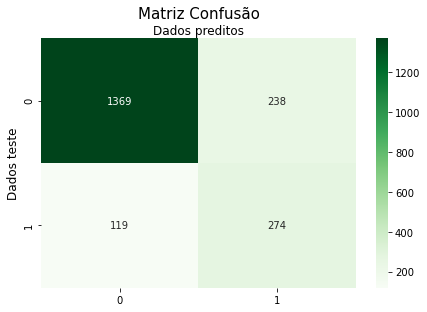

In [77]:
# Avaliação e Visualização dos resultados

print('\n Hiperparâmetros otimizados: {} \n'.format(clf2.best_params_) )

acuracia = accuracy_score(y_teste, random_forest_balanced)
print('\nAcurácia do modelo padrão: {:.3} %\n'.format(acuracia*100))

precisao = precision_score(y_teste, random_forest_balanced)
print('\nPrecisão do modelo padrão: {:.3} %\n'.format(precisao*100))

class_report = classification_report(y_teste, random_forest_balanced)
print('Relatório de classificação:\n', class_report)

# Edição dos componentes do gráfico
classes = [0,1]
fig, ax = plt.subplots()
marcadores = np.arange(len(classes))
plt.xticks(marcadores, classes)
plt.yticks(marcadores, classes)

# Criação do mapa de calor
matriz_rfbal = confusion_matrix(y_teste, random_forest_balanced)
sns.heatmap(pd.DataFrame(matriz_rfbal), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz Confusão', fontsize = 15)
plt.ylabel('Dados teste', fontsize = 12)
plt.xlabel('Dados preditos', fontsize = 12)

### Comentários

- Todas as observações feitas para o algoritmo da regressão logística são válidas;
- Em relação ao desempenho da regressão logística, os parâmetros de precisão e acurácia foram superiores; 
- O parâmetro _recall_ para a classe 1 foi ligeiramente pior em relação à regressão logística, contudo a precisão foi superior. 
- O parâmetro f1-score também foi superior em relação à regressão logística. 

## Ajuste e Melhorias do modelo escolhido

,0
Age,0.289644
NumOfProducts_2,0.157813
Balance,0.113506
CreditScore,0.065447
NumOfProducts_1,0.063680
EstimatedSalary,0.063207
NumOfProducts_3,0.055141
IsActiveMember,0.052867
Geography_Germany,0.036724
Tenure,0.035920


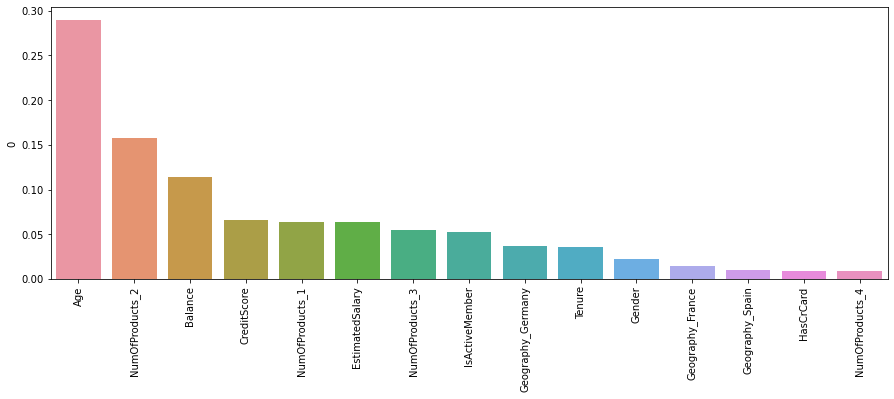

In [78]:
# Definição do modelo com os melhores hiperparâmetros
randomforest = RandomForestClassifier(max_depth = 10, min_samples_leaf = 3, 
                                     n_estimators = 60, n_jobs = -1)

# Rebalanceamento dos dados 
randomforest.fit(X_resampled, y_resampled)

importancia_features = pd.DataFrame(randomforest.feature_importances_, X_resampled.columns)
importancia_features = importancia_features.sort_values(by = 0, ascending = False)
display(importancia_features)
plt.figure(figsize = (15, 5))
ax = sns.barplot(x = importancia_features.index, y = importancia_features[0])
ax.tick_params(axis = 'x', rotation = 90)

### Comentários

- As últimas três variáveis (Geography_Spain, HashCrCard e NumOfProducts_4) não possuem muito impacto sobre o modelo final, por isso, serão excluídos do dataset para ajuste fino e redução das informações contidas no dataset.

In [79]:
X_final = X_final.drop(columns = ['NumOfProducts_4', 'HasCrCard', 'Geography_Spain'])

display(X_final.head(5))

,CreditScore,Gender,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3
0,0.538,0,0.324324,2,0.000000,1,0.506735,1,0,1,0,0
1,0.516,0,0.310811,1,0.334031,1,0.562709,0,0,1,0,0
2,0.304,0,0.324324,8,0.636357,0,0.569654,1,0,0,0,1
3,0.698,0,0.283784,1,0.000000,0,0.469120,1,0,0,1,0
4,1.000,0,0.337838,2,0.500246,1,0.395400,0,0,1,0,0


In [80]:
# Separação dos dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_final, Y, test_size = 0.20, random_state = 42)

# Método de balanceamento de dados - Oversampling
ros = RandomOverSampler(random_state = 42)

# Rebalanceamento do dataset de treino
X_resampled, y_resampled = ros.fit_resample(x_treino, y_treino)

display(X_resampled.shape)
display(y_resampled.shape)

# Validação cruzada do modelo Random Forest 
randomforest.fit(X_resampled, y_resampled)
rf = randomforest.predict(x_teste)

(12712, 12)

(12712,)


Acurácia do modelo padrão: 82.2 %


Precisão do modelo padrão: 53.3 %

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.53      0.75      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.80      0.75      2000
weighted avg       0.85      0.82      0.83      2000



Text(0.5, 257.44, 'Dados preditos')

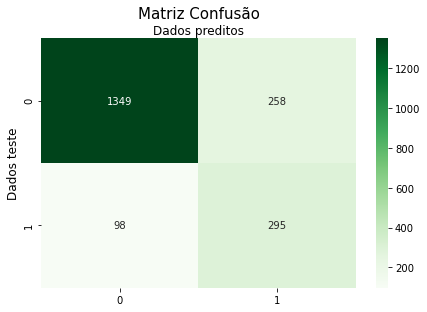

In [81]:
# Avaliação e Visualização dos resultados

acuracia = accuracy_score(y_teste, rf)
print('\nAcurácia do modelo padrão: {:.3} %\n'.format(acuracia*100))

precisao = precision_score(y_teste, rf)
print('\nPrecisão do modelo padrão: {:.3} %\n'.format(precisao*100))

class_report = classification_report(y_teste, rf)
print('Relatório de classificação:\n', class_report)

# Edição dos componentes do gráfico
classes = [0,1]
fig, ax = plt.subplots()
marcadores = np.arange(len(classes))
plt.xticks(marcadores, classes)
plt.yticks(marcadores, classes)

# Criação do mapa de calor
matriz_rfbal = confusion_matrix(y_teste, rf)
sns.heatmap(pd.DataFrame(matriz_rfbal), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz Confusão', fontsize = 15)
plt.ylabel('Dados teste', fontsize = 12)
plt.xlabel('Dados preditos', fontsize = 12)

### Comentários

- A exclusão das colunas foi responsável pela melhora do parâmetro _recall_ para a classe 1, indicando maior sensibilidade para detecção correta da saída dos clientes;
- Outro ponto bastante interessante foi a manutenção do desempenho dos outros parâmetros pela exclusão das colunas, indicando que as variáveis excluídas realmente não afetavam significamente o modelo. 

## Conclusões

- O problema de classificação binário definido através da variável 'Exited' foi avaliado para os algoritmos de classificação regressão logística e random_forest. 
- Inicialmente, com o dataset desbalanceado, o parâmetro _recall_ em relação à classe 1 (saída do cliente) era baixa, indicando pouca sensibilidade em relação aos dados reais verdadeiros. Os parâmetros acurácia e precisão calculados foram satisfatórios, porém correspondiam majoritariamente a qualidade de previsão para a classe 0, ou seja, clientes que permaneceram dentro do banco;
- O balanceamento de dados através da técnica de Oversampling melhorou significativamente o parâmetro _recall_ e _f1-score_ para classe 1. Além disso, observou-se uma queda de desempenho para acurácia geral e previsão, evidenciando um _trade-off_ e enviesamento provocado pelo balanceamento;
- A exclusão de colunas na análise de ajuste do modelo foi capaz de melhorar o parâmetro _recall_ para classe 1 sem a perda de desempenho das outras métricas de avaliação;
- **Para o problema de negócio definido pela análise de _churn_, a técnica de Oversampling mostra-se essencial para melhoria da previsão dos dados em relação à classe 1, ou seja, saída dos clientes. Naturalmente, ocasiona-se um enviesamento dos dados, provocando a perda de performance em relação à classe 0 (clientes remanescentes).**